### Load the Brent Oil Price Data

In [6]:
import pandas as pd

# Load CSV
data = pd.read_csv(r"C:\Users\bezis\Downloads\Brent-Oil-Insights\data\raw\BrentOilPrices.csv")

# Remove spaces around '-' (just for the old 80s data)
data['Date'] = data['Date'].str.replace(r'\s*-\s*', '-', regex=True)

# Convert to datetime, let Pandas infer the format
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)

# Sort by date
data = data.sort_values('Date')

# Reset index
data = data.reset_index(drop=True)

# Inspect
print(data.head(10))
print(data.tail(10))

C:\Users\bezis\AppData\Local\Temp\ipykernel_11020\3756215125.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
C:\Users\bezis\AppData\Local\Temp\ipykernel_11020\3756215125.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
5 1987-05-27  18.60
6 1987-05-28  18.60
7 1987-05-29  18.58
8 1987-06-01  18.65
9 1987-06-02  18.68
           Date  Price
9001 2022-11-01  95.12
9002 2022-11-02  96.07
9003 2022-11-03  95.29
9004 2022-11-04  99.53
9005 2022-11-07  99.87
9006 2022-11-08  96.85
9007 2022-11-09  93.05
9008 2022-11-10  94.25
9009 2022-11-11  96.37
9010 2022-11-14  93.59


### Summary Statistics

In [8]:
data["Price"].describe()

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

### Check for Missing or Duplicate Values

In [9]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

Date     0
Price    0
dtype: int64
0


### Plot the Raw Time Series

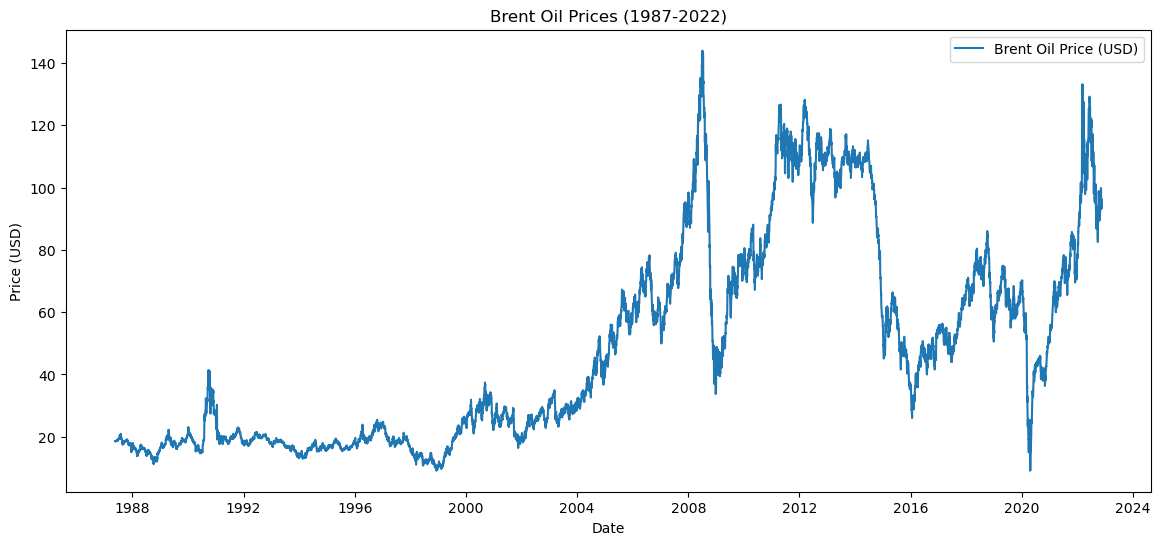

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price (USD)')
plt.title('Brent Oil Prices (1987-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

**Figure 1:** Daily Brent oil prices from May 1987 to September 2022.  
- This plot shows the overall trend of Brent oil prices over the last 35 years.  
- We can observe periods of stability, sharp increases, and steep declines. 

**Major events** : such as the Gulf War (1990), the 2008 financial crisis, the OPEC production decisions in 2014, and the COVID-19 pandemic in 2020, correspond to significant spikes or drops in prices.  

This visualization provides a first look at potential points where the market experienced structural changes, which will be analyzed further using Bayesian change point modeling.

###  Calculate Log Returns for Stationarity

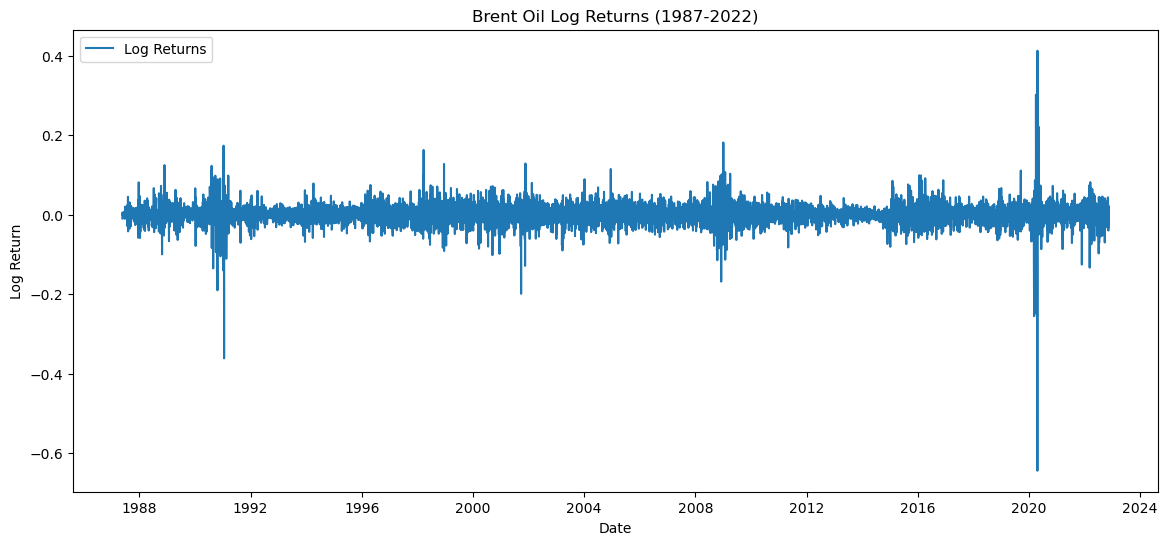

In [11]:
import numpy as np

data['Log_Returns'] = np.log(data['Price']) - np.log(data['Price'].shift(1))
data = data.dropna()  # Remove first NaN after shift

# Plot log returns
plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Log_Returns'], label='Log Returns')
plt.title('Brent Oil Log Returns (1987-2022)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()

**Figure 2:** Log returns of Brent oil prices.  
- Log returns are calculated as `log(price_t) - log(price_{t-1})`, which stabilizes the variance and makes the time series more stationary.  
- This plot highlights periods of high volatility, showing when the market reacted strongly to political, economic, or supply shocks. 
 
Clustering of large positive or negative returns indicates times of market stress, which are likely candidates for change points in our analysis.

In [15]:
import pandas as pd

events = {
    "Event": [
        "Iran-Iraq War Ends", "Gulf War", "Asian Financial Crisis", "Dot-Com Bubble",
        "9/11 Attacks", "Iraq War", "Housing Market Collapse", "2008 Financial Crisis",
        "Arab Spring", "OPEC Production Cut", "US Shale Oil Boom", "US Sanctions on Iran",
        "COVID-19 Pandemic", "Russia-Ukraine Conflict", "OPEC+ Production Adjustments"
    ],
    "Date": [
        "1988-08-20", "1990-08-02", "1997-07-02", "2000-03-10",
        "2001-09-11", "2003-03-20", "2007-09-15", "2008-09-15",
        "2010-12-17", "2014-11-06", "2015-01-01", "2018-11-01",
        "2020-03-01", "2022-02-24", "2022-04-01"
    ],
    "Type": [
        "Political/Conflict", "Political/Conflict", "Economic", "Economic",
        "Political/Conflict", "Political/Conflict", "Economic", "Economic",
        "Political/Conflict", "OPEC", "Supply/Market", "Political/Economic",
        "Economic/Global", "Political/Conflict", "OPEC/Policy"
    ],
    "Description": [
        "End of the Iran-Iraq war stabilizes oil supply temporarily.",
        "Iraq invades Kuwait, causing a sharp rise in oil prices due to supply disruption.",
        "Financial crisis in Asia leads to reduced oil demand and price drop.",
        "Technology market crash reduces economic growth, mildly affecting oil demand.",
        "Terrorist attacks on the US create market uncertainty and temporary oil price volatility.",
        "US-led invasion of Iraq increases geopolitical risk, affecting oil prices.",
        "Beginning of the global financial crisis, oil prices start fluctuating sharply.",
        "Global recession causes historic drop in oil demand and prices.",
        "Political uprisings in oil-producing countries increase market uncertainty.",
        "OPEC announces production cuts to stabilize falling oil prices.",
        "Rising US shale oil production leads to oversupply and price decline.",
        "Reimposed sanctions restrict Iranian exports, affecting global oil supply.",
        "Global lockdowns reduce demand dramatically, causing historic oil price drop.",
        "War triggers global supply concerns and major price spikes.",
        "OPEC+ changes production policy, influencing global oil price trends."
    ]
}

events_df = pd.DataFrame(events)
events_df.to_csv(r"C:\Users\bezis\Downloads\Brent-Oil-Insights\data\events.csv", index=False)